In [713]:
# Importing packages as required
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter(action='ignore')

# Data Collection & Exploratory Data Analysis (EDA)

In [714]:
# Reading the csv file
df = pd.read_csv('Pima-Indians-Diabetes.csv')

In [715]:
# Displaying the data
print(df.head())
print(df.tail())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766    

In [716]:
# Displaying some info of my dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [717]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [718]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [719]:
df.shape

(768, 9)

In [720]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

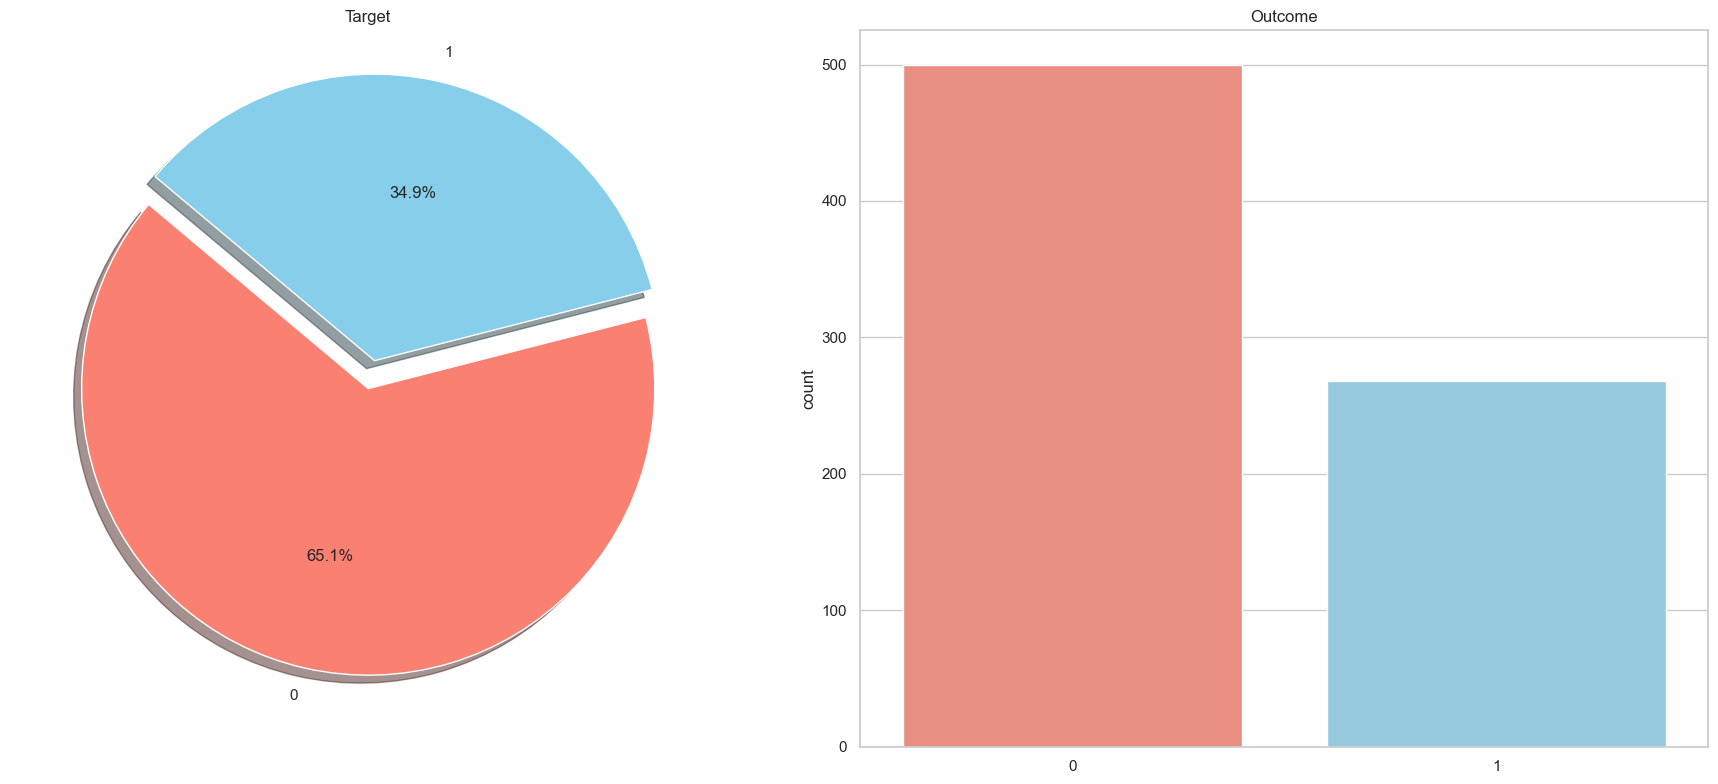

In [721]:
# 'Outcome' distribution 
colors = ['salmon', 'skyblue']

f, ax = plt.subplots(1, 2, figsize=(18, 8))

df['Outcome'].value_counts().plot.pie(
    explode=[0, 0.1], 
    autopct="%1.1f%%", 
    ax=ax[0], 
    shadow=True, 
    colors=colors,
    startangle=140
)
ax[0].set_title('Target')
ax[0].set_ylabel('')

sns.countplot(x='Outcome', data=df, ax=ax[1], palette=colors)
ax[1].set_title('Outcome')
ax[1].set_xlabel('')

plt.tight_layout()
plt.show()

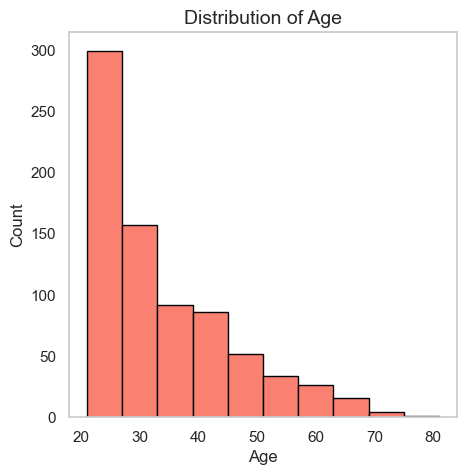

In [722]:
# Plotting the histogram of the 'Age' variable
plt.figure(figsize=(5,5))
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Age', fontsize=14)
df['Age'].hist(edgecolor="black", color='salmon')
plt.grid(False)  # Optional: Remove the grid if preferred
plt.show()


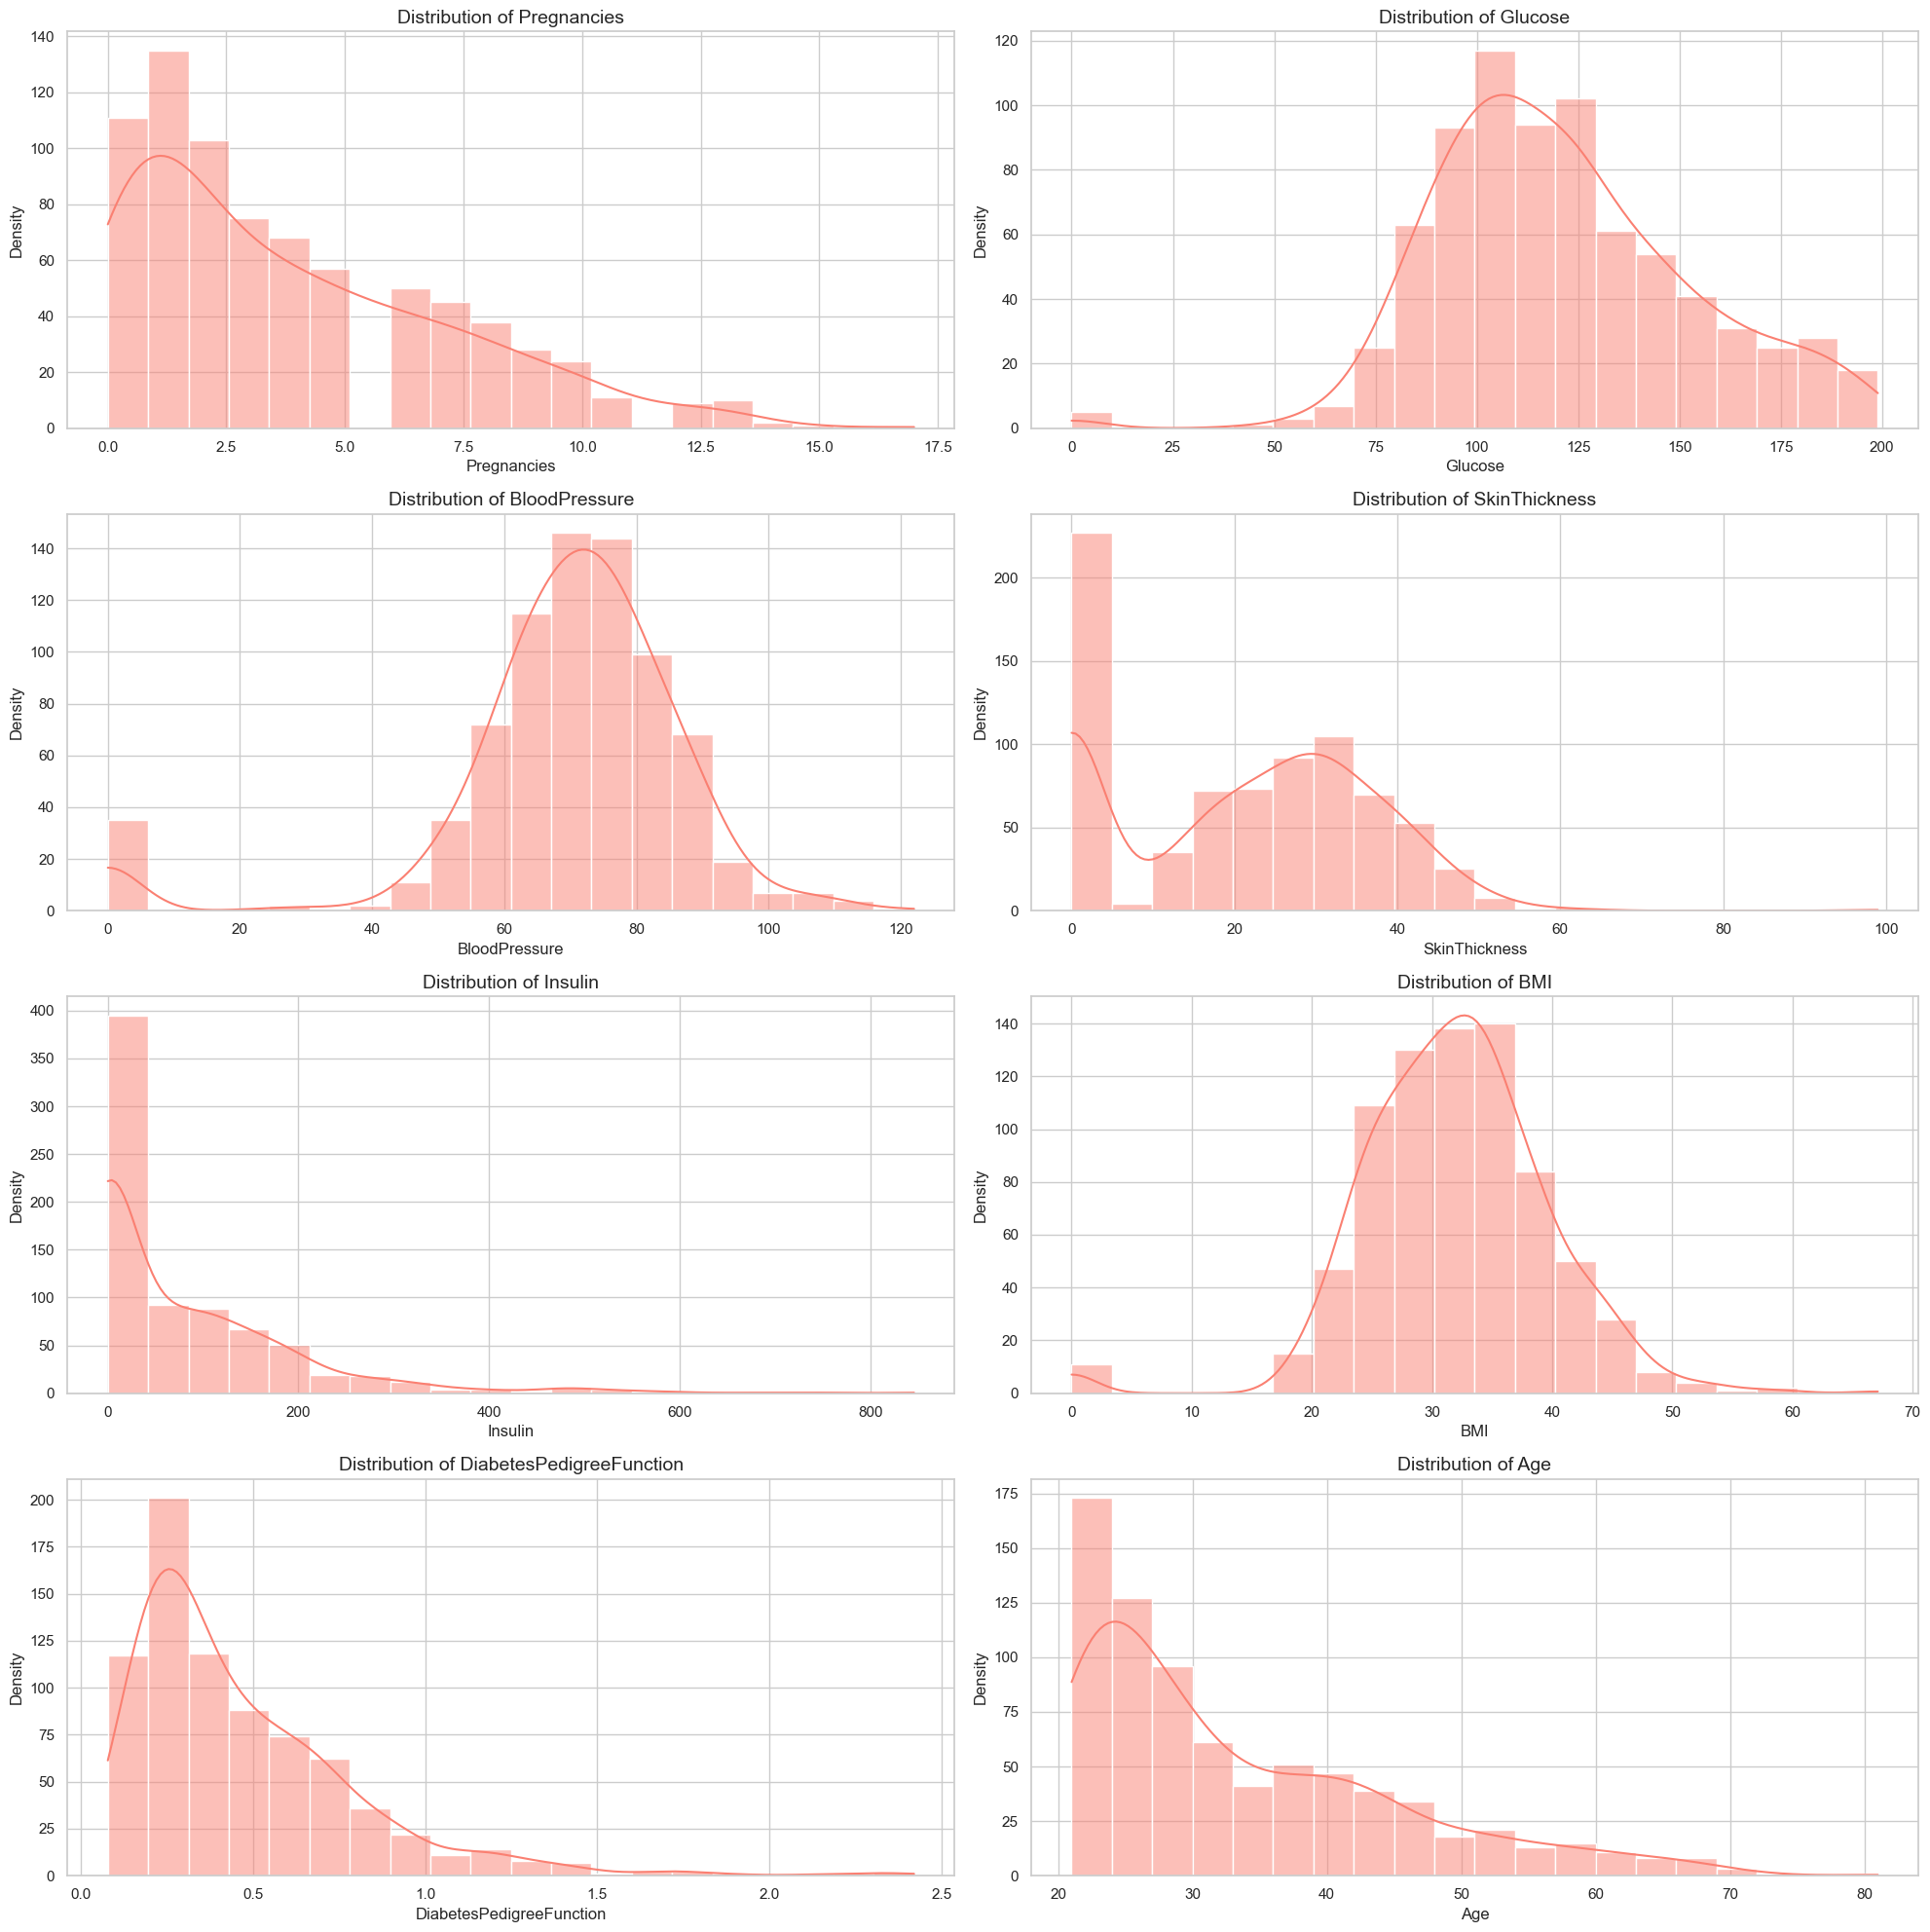

In [723]:
# Density distribution
fig, ax = plt.subplots(4, 2, figsize=(20, 20))


columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
colors = "salmon"
for i, col in enumerate(columns):
    sns.histplot(df[col], bins=20, ax=ax[i // 2, i % 2], color=colors, kde=True)
    ax[i // 2, i % 2].set_title(f'Distribution of {col}', fontsize=14)
    ax[i // 2, i % 2].set_xlabel(col, fontsize=12)
    ax[i // 2, i % 2].set_ylabel('Density', fontsize=12)


plt.tight_layout()
plt.show()

In [724]:
# Correlation matrix
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


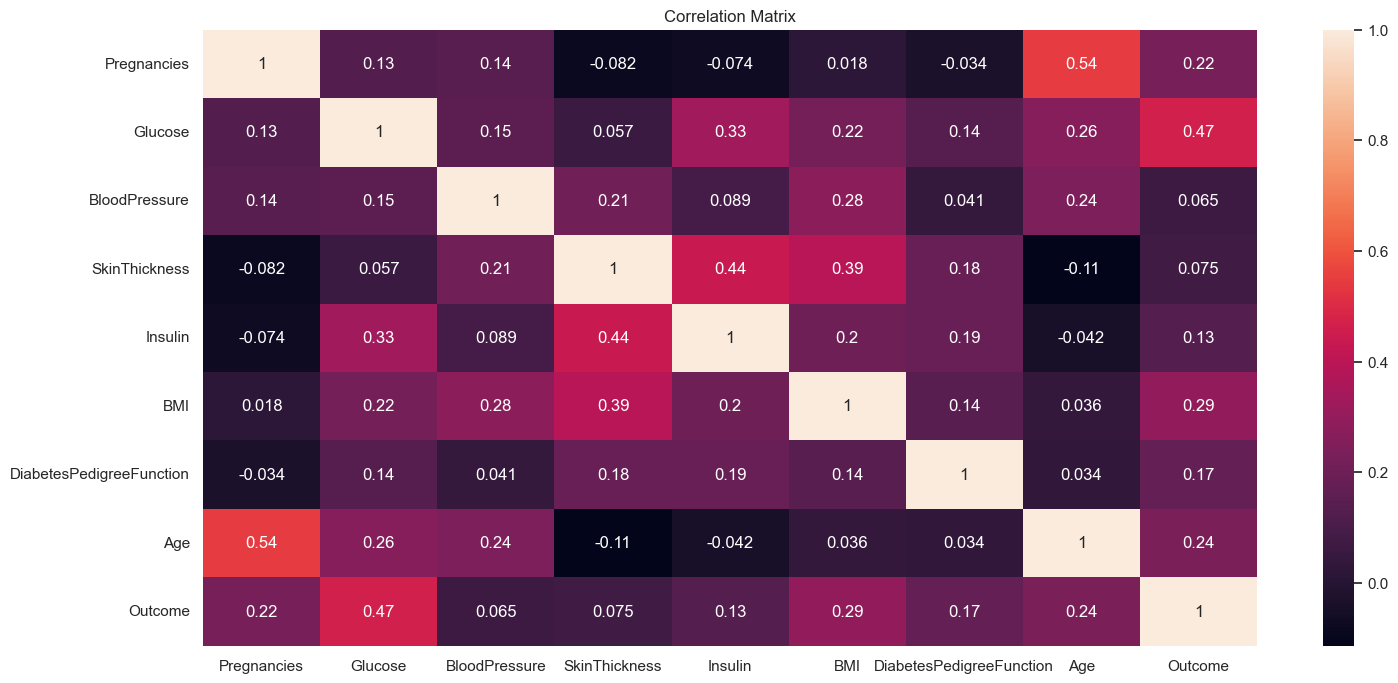

In [725]:
# Heatmap to visualize correlations between numeric columns
plt.figure(1 , figsize = (17 , 8))
cor = sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

In [726]:
corr_matrix = df.corr()
corr_matrix["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

# Data Cleaning

In [727]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [728]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']].replace(0, np.NaN)

In [729]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [730]:
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [731]:
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [732]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [733]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.389323,29.089844,141.753906,32.434635,0.471876,33.240885,0.348958
std,3.369578,30.464161,12.106039,8.890820,89.100847,6.880498,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,102.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,102.500000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,169.500000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [734]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

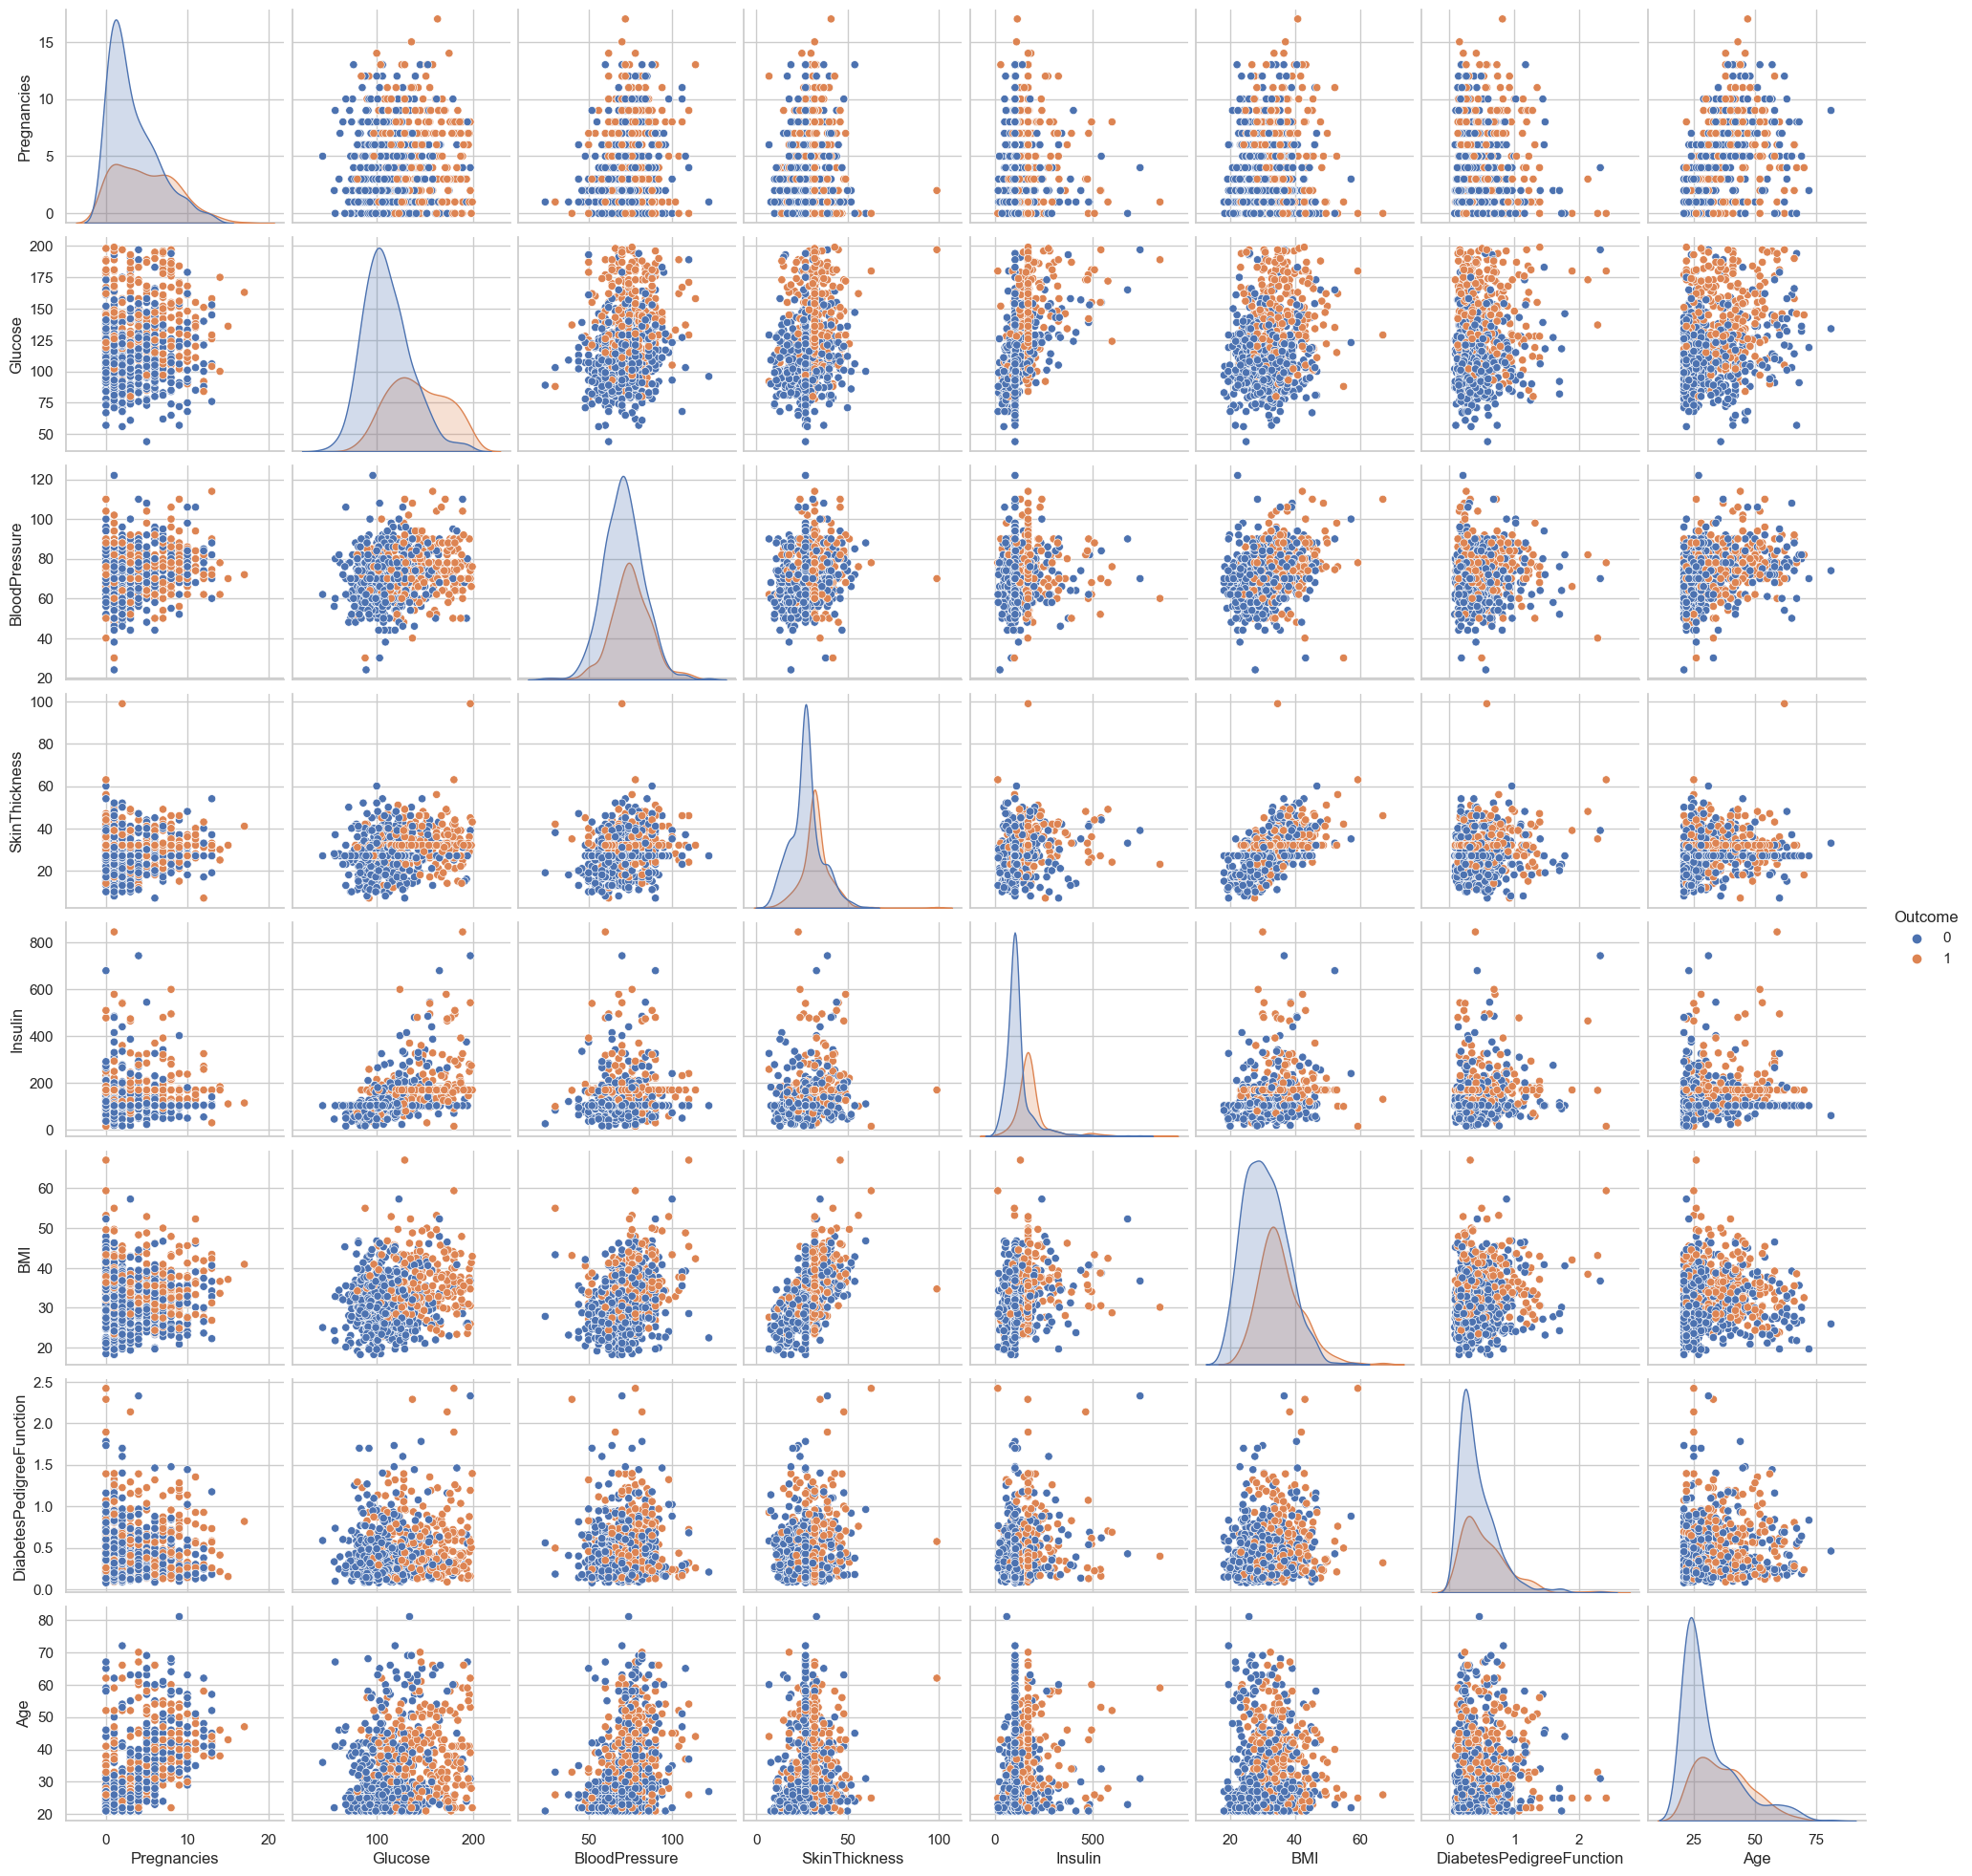

In [735]:
# pair plot
p = sns.pairplot(df, hue="Outcome")

In [736]:
# Outlier Detection
for feature in df:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    if df[(df[feature]>upper)].any(axis=None):
        print(feature, "yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


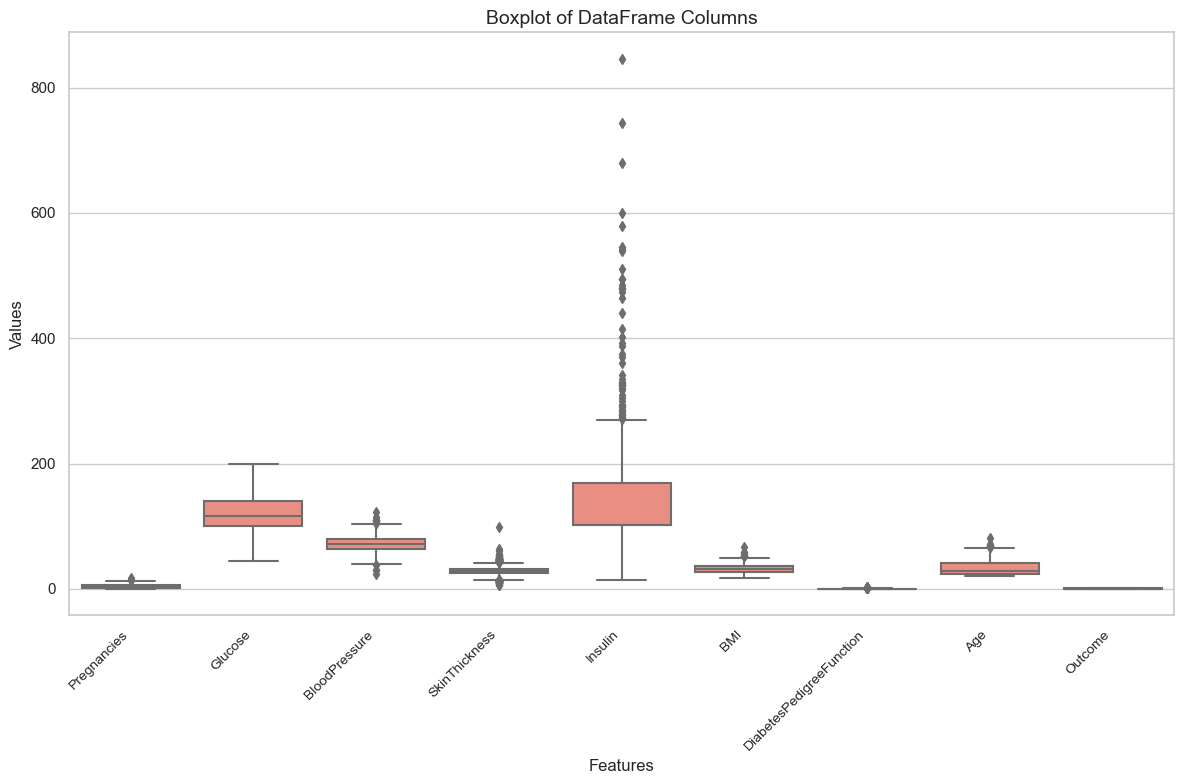

In [737]:
# Creating the boxplot
plt.figure(figsize=(12, 8)) 
sns.boxplot(data=df, color="salmon")

plt.xticks(rotation=45, ha='right', fontsize=10)


plt.title('Boxplot of DataFrame Columns', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Values', fontsize=12)


plt.tight_layout()
plt.show()

In [738]:
def replace_outliers_with_median(df):
    for feature in df.columns:
        if feature != 'Outcome':
            
            while True:
                Q1 = df[feature].quantile(0.25)
                Q3 = df[feature].quantile(0.75)
                IQR = Q3 - Q1
                lower = Q1 - 1.5 * IQR
                upper = Q3 + 1.5 * IQR

               
                median = df[feature].median()

                
                outliers = (df[feature] < lower) | (df[feature] > upper)

                
                if not outliers.any():
                    break

                
                df.loc[outliers, feature] = median

    return df


df = replace_outliers_with_median(df)


print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    169.5  33.6   
1              1     85.0           66.0           29.0    102.5  26.6   
2              8    183.0           64.0           32.0    169.5  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           28.0    180.0  32.9   
764            2    122.0           70.0           27.0    102.5  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           32.0    169.5  30.1   
767            1     93.0           70.0           31.0    102.5  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                      0.6270   50        1  
1                  

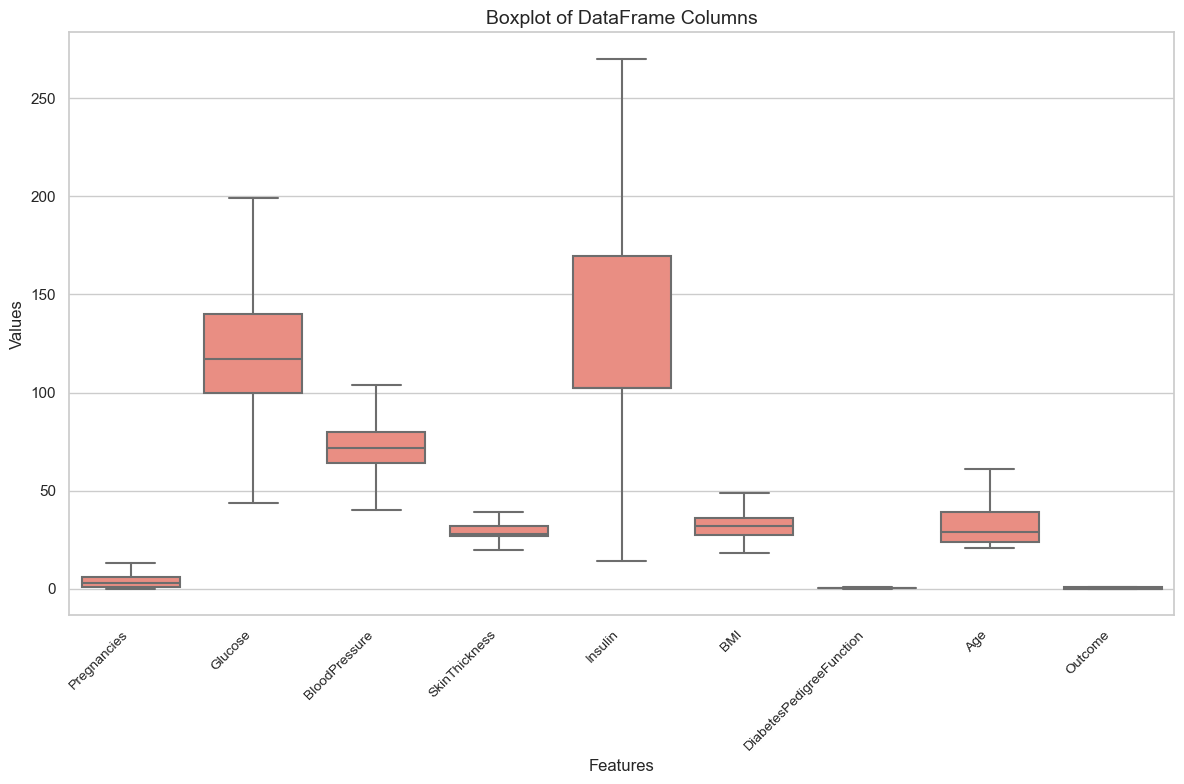

In [739]:
# Creating the boxplot
plt.figure(figsize=(12, 8)) 
sns.boxplot(data=df, color="salmon")

plt.xticks(rotation=45, ha='right', fontsize=10)


plt.title('Boxplot of DataFrame Columns', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Values', fontsize=12)


plt.tight_layout()
plt.show()

# Feature Enginnering

In [740]:
UpdatedBMI = pd.Series(["Severely underweight","Underweight","Normal", "Overweight","Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

In [741]:
UpdatedBMI

0    Severely underweight
1             Underweight
2                  Normal
3              Overweight
4               Obesity 1
5               Obesity 2
6               Obesity 3
dtype: category
Categories (7, object): ['Normal', 'Obesity 1', 'Obesity 2', 'Obesity 3', 'Overweight', 'Severely underweight', 'Underweight']

### https://www.ncbi.nlm.nih.gov/books/NBK541070/

In [742]:
df['UpdatedBMI'] = UpdatedBMI

df.loc[df["BMI"]<16.5, "UpdatedBMI"] = UpdatedBMI[0]
df.loc[(df["BMI"]>16.5) & df["BMI"]<=18.5, "UpdatedBMI"] = UpdatedBMI[1]
df.loc[(df["BMI"]>18.5) & df["BMI"]<=24.9, "UpdatedBMI"] = UpdatedBMI[2]
df.loc[(df["BMI"]>24.9) & df["BMI"]<=29.9, "UpdatedBMI"] = UpdatedBMI[3]
df.loc[(df["BMI"]>29.9) & df["BMI"]<=34.9, "UpdatedBMI"] = UpdatedBMI[4]
df.loc[(df["BMI"]>34.9) & df["BMI"]<=39.9, "UpdatedBMI"] = UpdatedBMI[5]
df.loc[df["BMI"]>39.9, "UpdatedBMI"] = UpdatedBMI[6]

In [743]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,UpdatedBMI
0,6,148.0,72.0,35.0,169.5,33.6,0.6270,50,1,Obesity 2
1,1,85.0,66.0,29.0,102.5,26.6,0.3510,31,0,Obesity 2
2,8,183.0,64.0,32.0,169.5,23.3,0.6720,32,1,Obesity 2
3,1,89.0,66.0,23.0,94.0,28.1,0.1670,21,0,Obesity 2
4,0,137.0,40.0,35.0,168.0,43.1,0.3725,33,1,Obesity 3


### https://www.medicinenet.com/what_is_a_high_insulin_level/article.htm

In [744]:
def set_insuline(row):
    if row["Insulin"]>=16 and row["Insulin"]<=166:
        return "Normal"
    else:
        return "Abnormal"

In [745]:
df = df.assign(NewInsulinScore=df.apply(set_insuline, axis=1))

In [746]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,UpdatedBMI,NewInsulinScore
0,6,148.0,72.0,35.0,169.5,33.6,0.6270,50,1,Obesity 2,Abnormal
1,1,85.0,66.0,29.0,102.5,26.6,0.3510,31,0,Obesity 2,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.6720,32,1,Obesity 2,Abnormal
3,1,89.0,66.0,23.0,94.0,28.1,0.1670,21,0,Obesity 2,Normal
4,0,137.0,40.0,35.0,168.0,43.1,0.3725,33,1,Obesity 3,Abnormal


### https://www.forbes.com/health/wellness/normal-blood-sugar-levels/

In [747]:
# Create a new categorical series for glucose levels
NewGlucose = pd.Series(["Low", "Normal", "Prediabetes", "Diabetes"], dtype="category")


df["NewGlucose"] = pd.Categorical([""] * len(df), categories=NewGlucose)


df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 125), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] >= 126, "NewGlucose"] = NewGlucose[3]


In [748]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,UpdatedBMI,NewInsulinScore,NewGlucose
0,6,148.0,72.0,35.0,169.5,33.6,0.6270,50,1,Obesity 2,Abnormal,Diabetes
1,1,85.0,66.0,29.0,102.5,26.6,0.3510,31,0,Obesity 2,Normal,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.6720,32,1,Obesity 2,Abnormal,Diabetes
3,1,89.0,66.0,23.0,94.0,28.1,0.1670,21,0,Obesity 2,Normal,Normal
4,0,137.0,40.0,35.0,168.0,43.1,0.3725,33,1,Obesity 3,Abnormal,Diabetes


In [749]:
# One hot encoding
df = pd.get_dummies(df, columns = ["UpdatedBMI", "NewInsulinScore", "NewGlucose"], drop_first=True)

In [750]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,UpdatedBMI_Obesity 1,UpdatedBMI_Obesity 2,UpdatedBMI_Obesity 3,UpdatedBMI_Overweight,UpdatedBMI_Severely underweight,UpdatedBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Prediabetes
0,6,148.0,72.0,35.0,169.5,33.6,0.6270,50,1,False,True,False,False,False,False,False,False,False,False
1,1,85.0,66.0,29.0,102.5,26.6,0.3510,31,0,False,True,False,False,False,False,True,False,True,False
2,8,183.0,64.0,32.0,169.5,23.3,0.6720,32,1,False,True,False,False,False,False,False,False,False,False
3,1,89.0,66.0,23.0,94.0,28.1,0.1670,21,0,False,True,False,False,False,False,True,False,True,False
4,0,137.0,40.0,35.0,168.0,43.1,0.3725,33,1,False,False,True,False,False,False,False,False,False,False


In [751]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome',
       'UpdatedBMI_Obesity 1', 'UpdatedBMI_Obesity 2', 'UpdatedBMI_Obesity 3',
       'UpdatedBMI_Overweight', 'UpdatedBMI_Severely underweight',
       'UpdatedBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Prediabetes'],
      dtype='object')

In [752]:
categorical_df = df[['UpdatedBMI_Obesity 1', 'UpdatedBMI_Obesity 2', 'UpdatedBMI_Obesity 3',
       'UpdatedBMI_Overweight', 'UpdatedBMI_Severely underweight',
       'UpdatedBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Prediabetes']]

In [753]:
categorical_df.head()

,UpdatedBMI_Obesity 1,UpdatedBMI_Obesity 2,UpdatedBMI_Obesity 3,UpdatedBMI_Overweight,UpdatedBMI_Severely underweight,UpdatedBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Prediabetes
0,False,True,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,True,False,True,False
2,False,True,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,True,False,True,False
4,False,False,True,False,False,False,False,False,False,False


In [754]:
y=df['Outcome']
X=df.drop(['Outcome','UpdatedBMI_Obesity 1', 'UpdatedBMI_Obesity 2', 'UpdatedBMI_Obesity 3',
       'UpdatedBMI_Overweight', 'UpdatedBMI_Severely underweight',
       'UpdatedBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Prediabetes'], axis=1)

In [755]:
cols = X.columns
index = X.index

In [756]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,169.5,33.6,0.6270,50
1,1,85.0,66.0,29.0,102.5,26.6,0.3510,31
2,8,183.0,64.0,32.0,169.5,23.3,0.6720,32
3,1,89.0,66.0,23.0,94.0,28.1,0.1670,21
4,0,137.0,40.0,35.0,168.0,43.1,0.3725,33


In [757]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X=transformer.transform(X)
X=pd.DataFrame(X, columns = cols, index = index)

In [758]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.765432,0.000,1.4,1.000000,0.185320,0.836979,1.400000
1,-0.4,-0.790123,-0.375,0.2,0.000000,-0.628634,-0.065720,0.133333
2,1.0,1.629630,-0.500,0.8,1.000000,-1.012355,0.984158,0.200000
3,-0.4,-0.691358,-0.375,-1.0,-0.126866,-0.454215,-0.667518,-0.533333
4,-0.6,0.493827,-2.000,1.4,0.977612,1.289971,0.004599,0.266667


In [759]:
X = pd.concat([X, categorical_df], axis=1)

In [760]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,UpdatedBMI_Obesity 1,UpdatedBMI_Obesity 2,UpdatedBMI_Obesity 3,UpdatedBMI_Overweight,UpdatedBMI_Severely underweight,UpdatedBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Prediabetes
0,0.6,0.765432,0.000,1.4,1.000000,0.185320,0.836979,1.400000,False,True,False,False,False,False,False,False,False,False
1,-0.4,-0.790123,-0.375,0.2,0.000000,-0.628634,-0.065720,0.133333,False,True,False,False,False,False,True,False,True,False
2,1.0,1.629630,-0.500,0.8,1.000000,-1.012355,0.984158,0.200000,False,True,False,False,False,False,False,False,False,False
3,-0.4,-0.691358,-0.375,-1.0,-0.126866,-0.454215,-0.667518,-0.533333,False,True,False,False,False,False,True,False,True,False
4,-0.6,0.493827,-2.000,1.4,0.977612,1.289971,0.004599,0.266667,False,False,True,False,False,False,False,False,False,False


# Data Splitting

In [761]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [762]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training & Evaluation

### Logistic Regreesion

In [763]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [764]:
y_pred = log_reg.predict(X_test)

In [765]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report

accuracy_score(y_train, log_reg.predict(X_train))

0.8501628664495114

In [766]:
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))

In [767]:
confusion_matrix(y_test, y_pred)

array([[98,  9],
       [ 6, 41]])

In [768]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       107
           1       0.82      0.87      0.85        47

    accuracy                           0.90       154
   macro avg       0.88      0.89      0.89       154
weighted avg       0.90      0.90      0.90       154



### KNN

In [769]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_train, knn.predict(X_train)))
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(accuracy_score(y_test, knn.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8697068403908795
0.8376623376623377
[[94 13]
 [12 35]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       107
           1       0.73      0.74      0.74        47

    accuracy                           0.84       154
   macro avg       0.81      0.81      0.81       154
weighted avg       0.84      0.84      0.84       154



### SVM

In [770]:
from sklearn.svm import SVC

svc = SVC(probability=True)
parameter = {
    "gamma":[0.0001, 0.001, 0.01, 0.1],
    'C': [0.01, 0.05,0.5, 0.01, 1, 10, 15, 20]
}
grid_search = GridSearchCV(svc, parameter)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.01, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [771]:
# best_parameter
grid_search.best_params_

{'C': 1, 'gamma': 0.1}

In [772]:
grid_search.best_score_

0.8468612554978009

In [773]:
svc = SVC(C=10, gamma = 0.01, probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(y_train, svc.predict(X_train)))
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(accuracy_score(y_test, svc.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8599348534201955
0.9090909090909091
[[100   7]
 [  7  40]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       107
           1       0.85      0.85      0.85        47

    accuracy                           0.91       154
   macro avg       0.89      0.89      0.89       154
weighted avg       0.91      0.91      0.91       154



### Decision Tree

In [774]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
print(accuracy_score(y_train, DT.predict(X_train)))

print(accuracy_score(y_test, DT.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
0.8181818181818182
[[91 16]
 [12 35]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       107
           1       0.69      0.74      0.71        47

    accuracy                           0.82       154
   macro avg       0.78      0.80      0.79       154
weighted avg       0.82      0.82      0.82       154



In [775]:
# hyperparameter tuning of dt
grid_param = {
    'criterion':['gini','entropy'],
    'max_depth' :  [3,5,7,10],
    'splitter' : ['best','radom'],
    'min_samples_leaf':[1,2,3,5,7], 
    'min_samples_split':[1,2,3,5,7], 
    'max_features':['auto','sqrt','log2']
}
grid_search_dt = GridSearchCV(DT, grid_param, cv=50, n_jobs=-1, verbose = 1)
grid_search_dt.fit(X_train, y_train)

Fitting 50 folds for each of 1200 candidates, totalling 60000 fits


GridSearchCV(cv=50, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'radom']},
             verbose=1)

In [776]:
grid_search_dt.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'splitter': 'best'}

In [777]:
grid_search_dt.best_score_

0.8498717948717948

In [778]:
DT = grid_search_dt.best_estimator_
y_pred = DT.predict(X_test)
print(accuracy_score(y_train, DT.predict(X_train)))
dt_acc = accuracy_score(y_test, DT.predict(X_test))
print(accuracy_score(y_test, DT.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8648208469055375
0.8766233766233766
[[98  9]
 [10 37]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       107
           1       0.80      0.79      0.80        47

    accuracy                           0.88       154
   macro avg       0.86      0.85      0.85       154
weighted avg       0.88      0.88      0.88       154



### Random Forest Classifier

In [779]:
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 0.75, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [780]:
y_pred = rand_clf.predict(X_test)

In [781]:
y_pred = rand_clf.predict(X_test)
print(accuracy_score(y_train, rand_clf.predict(X_train)))
rand_acc = accuracy_score(y_test, rand_clf.predict(X_test))
print(accuracy_score(y_test, rand_clf.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9869706840390879
0.8961038961038961
[[98  9]
 [ 7 40]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       107
           1       0.82      0.85      0.83        47

    accuracy                           0.90       154
   macro avg       0.87      0.88      0.88       154
weighted avg       0.90      0.90      0.90       154



### Gradient Boosting Classifier

In [782]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 10, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [783]:
grid_search_gbc.best_params_

{'learning_rate': 1, 'loss': 'exponential', 'n_estimators': 200}

In [784]:
grid_search_gbc.best_score_

0.8745637228979376

In [785]:
gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'exponential', n_estimators = 150)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(loss='exponential', n_estimators=150)

In [786]:
gbc = grid_search_gbc.best_estimator_
y_pred = gbc.predict(X_test)
print(accuracy_score(y_train, gbc.predict(X_train)))
gbc_acc = accuracy_score(y_test, gbc.predict(X_test))
print(accuracy_score(y_test, gbc.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
0.8831168831168831
[[95 12]
 [ 6 41]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       107
           1       0.77      0.87      0.82        47

    accuracy                           0.88       154
   macro avg       0.86      0.88      0.87       154
weighted avg       0.89      0.88      0.88       154



### XgBoost

In [787]:
!pip install xgboost
from xgboost import XGBClassifier 
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 10, n_estimators = 180)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [788]:
y_pred = xgb.predict(X_test)
print(accuracy_score(y_train, xgb.predict(X_train)))
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print(accuracy_score(y_test, xgb.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9674267100977199
0.8896103896103896
[[99  8]
 [ 9 38]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       107
           1       0.83      0.81      0.82        47

    accuracy                           0.89       154
   macro avg       0.87      0.87      0.87       154
weighted avg       0.89      0.89      0.89       154



In [789]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'XgBoost'],
    'Score': [100 * round(log_reg_acc, 4), 100 * round(knn_acc, 4), 100 * round(svc_acc, 4), 100 * round(dt_acc, 4), 100 * round(rand_acc, 4), 
              100 * round(gbc_acc, 4), 100 * round(xgb_acc, 4)]
})


print(models.sort_values(by='Score', ascending=False))


best_model_name = models.loc[models['Score'].idxmax(), 'Model']
best_model_score = models['Score'].max()

print(f"The best model is: {best_model_name} with a score of {best_model_score}")


model_objects = {
    'Logistic Regression': log_reg,
    'KNN': knn,
    'SVM': svc,
    'Decision Tree Classifier': DT,
    'Random Forest Classifier': rand_clf,
    'Gradient Boosting Classifier': gbc,
    'XgBoost': xgb
}


best_model = model_objects[best_model_name]


with open("best_model.pkl", 'wb') as file:
    pickle.dump(best_model, file)

                          Model  Score
2                           SVM  90.91
0           Logistic Regression  90.26
4      Random Forest Classifier  89.61
6                       XgBoost  88.96
5  Gradient Boosting Classifier  88.31
3      Decision Tree Classifier  87.66
1                           KNN  83.77
The best model is: SVM with a score of 90.91


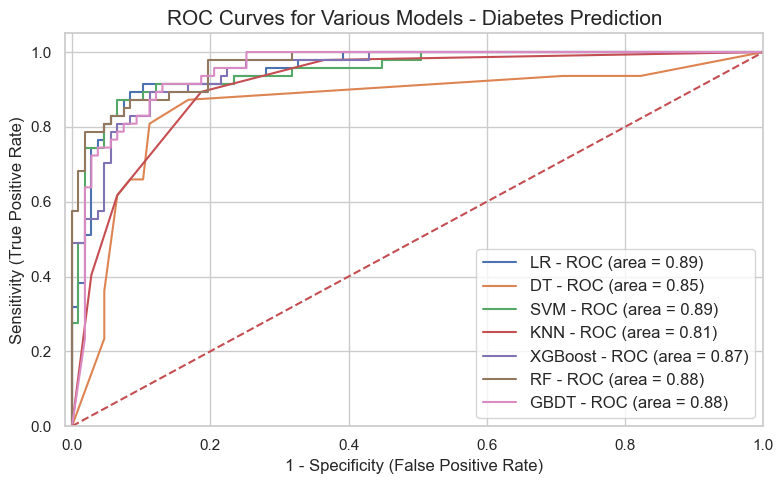

In [790]:

plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'DT',
    'model': DT,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]
for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1], 'r--')


plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC Curves for Various Models - Diabetes Prediction', fontsize=15)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.tight_layout()


plt.savefig("roc_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

Accuracy scores: [90.25999999999999, 87.66000000000001, 90.91, 83.77, 88.96, 89.61, 88.31]
ROC AUC scores: [89.41, 82.22, 89.28, 81.16, 86.69, 88.81, 88.01]


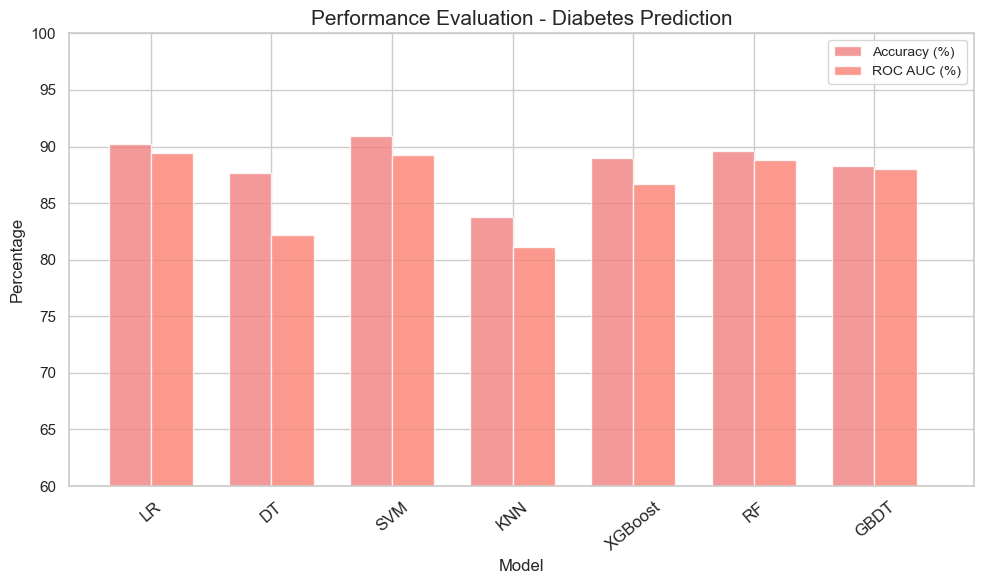

In [791]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'DT',
    'model': DT,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]

means_roc = []
means_accuracy = [100*round(log_reg_acc,4), 100*round(dt_acc,4), 100*round(svc_acc,4), 100*round(knn_acc,4), 100*round(xgb_acc,4), 
                  100*round(rand_acc,4), 100*round(gbc_acc,4)]

for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print("Accuracy scores:", means_accuracy)
print("ROC AUC scores:", means_roc)

# Data to plot
n_groups = len(models)
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='lightcoral',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='salmon',
label='ROC AUC (%)')

# Plot formatting
plt.xlabel('Model', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Performance Evaluation - Diabetes Prediction', fontsize=15)
plt.xticks(index + bar_width / 2, ('LR', 'DT', 'SVM', 'KNN', 'XGBoost', 'RF', 'GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.grid(True)

# Adjust plot limits
plt.xlim([-0.5, n_groups])
plt.ylim([60, 100])

# Save and show plot
plt.tight_layout()
plt.savefig("PE_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()
